# IMPORTING LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# CONNECTING TO DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/Tumor') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
len(os.listdir('/Tumor/'))

2

# DATA ACQUISTION & PRPEATATION


In [ ]:
#path = os.listdir('/Tumor/')
classes = {'glioma':0,'meningioma':1 ,'pituitary':2}

In [ ]:
classes_ = ['glioma','meningioma','pituitary']

In [ ]:
len(os.listdir('/Tumor/Training/'))

4

In [ ]:
import cv2
#in X appending image
# in Y appending corresponding labels 
X = []
Y = []
for cls in classes:
    pth = '/Tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
Y[1]

0

In [ ]:
len(X)

4117

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)# flattening the image into 200 * 200 = 40000

In [ ]:
np.unique(Y)

array([0, 1, 2])

In [ ]:
pd.Series(Y).value_counts()

2    1457
1    1339
0    1321
dtype: int64

In [ ]:
1457+1339+1321

4117

In [ ]:
X.shape, X_updated.shape

((4117, 200, 200), (4117, 40000))

# DATA VISUALIZATION

In [ ]:
X_updated[0].shape

(40000,)

'glioma'

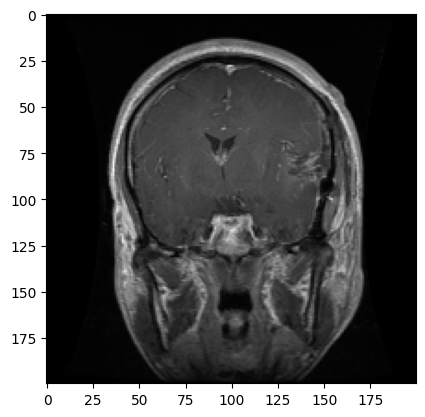

In [ ]:
plt.imshow(X[6], cmap='gray')
classes_[Y[6]]

**Flattening  data**

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(4117, 40000)

#split data

In [ ]:
Y

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20,stratify=Y)

In [ ]:
x_train.shape

(3293, 40000)

In [ ]:
pd.Series(y_train).value_counts()

2    1165
1    1071
0    1057
dtype: int64

In [ ]:
x_test.shape

(824, 40000)

# Normalization

In [ ]:
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())
x_train = x_train/255
x_test = x_test/255
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA
#no need of using pca we may lost data

# Build model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lg = LogisticRegression(C=0.1)
lg.fit(x_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
#kernal : rbf for this complex data rbf works well
sv = SVC()
sv.fit(x_train, y_train)

SVC()

# Evaluation

In [ ]:
print("Training Score:", lg.score(x_train, y_train))
print("Testing Score:", lg.score(x_test, y_test))

Training Score: 0.9993926510780443
Testing Score: 0.8361650485436893


In [ ]:
print("Training Score:", sv.score(x_train, y_train))
print("Testing Score:", sv.score(x_test, y_test))

Training Score: 0.9514120862435469
Testing Score: 0.8822815533980582


# prediction & Testing

In [ ]:
pred = sv.predict(x_test)

In [ ]:
misclassified=np.where(y_test!=pred)
misclassified

(array([   3,    4,   20,   22,   27,   28,   35,   75,   77,   79,   81,
          87,   93,   97,   98,  106,  108,  116,  135,  147,  157,  159,
         170,  175,  186,  188,  190,  198,  200,  208,  224,  226,  232,
         233,  237,  250,  262,  263,  264,  271,  281,  288,  294,  301,
         304,  312,  314,  337,  339,  355,  367,  370,  373,  381,  385,
         387,  399,  403,  404,  409,  412,  423,  432,  435,  439,  468,
         475,  477,  481,  485,  490,  507,  517,  527,  531,  543,  548,
         551,  560,  561,  562,  569,  570,  577,  585,  588,  600,  603,
         607,  658,  663,  667,  668,  673,  676,  682,  690,  694,  699,
         701,  707,  727,  733,  740,  744,  751,  755,  758,  761,  767,
         775,  784,  790,  792,  803,  814,  815,  826,  835,  836,  847,
         852,  886,  891,  900,  902,  903,  909,  912,  919,  933,  937,
         939,  956,  959,  962,  963,  982,  988, 1003, 1016, 1019, 1022,
        1025, 1032, 1040, 1048, 1049, 

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[3],y_test[3])

Total Misclassified Samples:  157
3 2
